<a href="https://colab.research.google.com/github/Santhosh-Janakiraman/Senior-DE-Tech-Challenge/blob/main/2_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/Teaching/TME_6015/Assignment_1_v2/
%ls

/content/drive/MyDrive/Teaching/TME_6015/Assignment_1_v2
0/  1/  2/  3/  4/  5/  6/  7/  8/  9/


Build and evaluate a model using the MNIST dataset, for numbers

In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [8]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data Preprocessing
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
# Base Model - Building
base_model = models.Sequential()
base_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
base_model.add(layers.MaxPooling2D((2, 2)))
base_model.add(layers.Flatten())
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(10, activation='softmax'))

base_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Base Model - Training
history_base_model = base_model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 13s 4ms/step - loss: 0.2437 - accuracy: 0.9284 - val_loss: 0.0917 - val_accuracy: 0.9749
Epoch 2/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0780 - accuracy: 0.9765 - val_loss: 0.0815 - val_accuracy: 0.9760
Epoch 3/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0535 - accuracy: 0.9840 - val_loss: 0.0627 - val_accuracy: 0.9822
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 0.0595 - val_accuracy: 0.9835
Epoch 5/5
750/750 [==============================] - 3s 4ms/step - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0589 - val_accuracy: 0.9845


In [10]:
# Base Model Evaluation
test_loss, test_acc = base_model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')

313/313 [==============================] - 1s 3ms/step - loss: 0.0497 - accuracy: 0.9851
Test accuracy: 98.51%


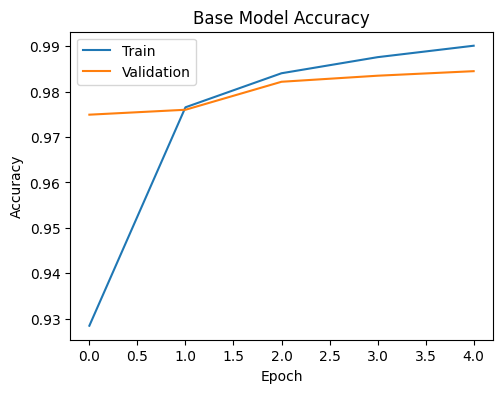

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_base_model.history['accuracy'])
plt.plot(history_base_model.history['val_accuracy'])
plt.title('Base Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')




***

Train the model for 10 epochs
Epoch 1/10
750/750 [==============================] - 8s 6ms/step - loss: 0.2146 - accuracy: 0.9352 - val_loss: 0.0664 - val_accuracy: 0.9781
Epoch 2/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0586 - accuracy: 0.9816 - val_loss: 0.0556 - val_accuracy: 0.9818
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.0472 - val_accuracy: 0.9862
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0304 - accuracy: 0.9901 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0252 - accuracy: 0.9918 - val_loss: 0.0350 - val_accuracy: 0.9893
Epoch 6/10
750/750 [==============================] - 5s 6ms/step - loss: 0.0201 - accuracy: 0.9934 - val_loss: 0.0388 - val_accuracy: 0.9900
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0161 - accuracy: 0.9952 - val_loss: 0.0415

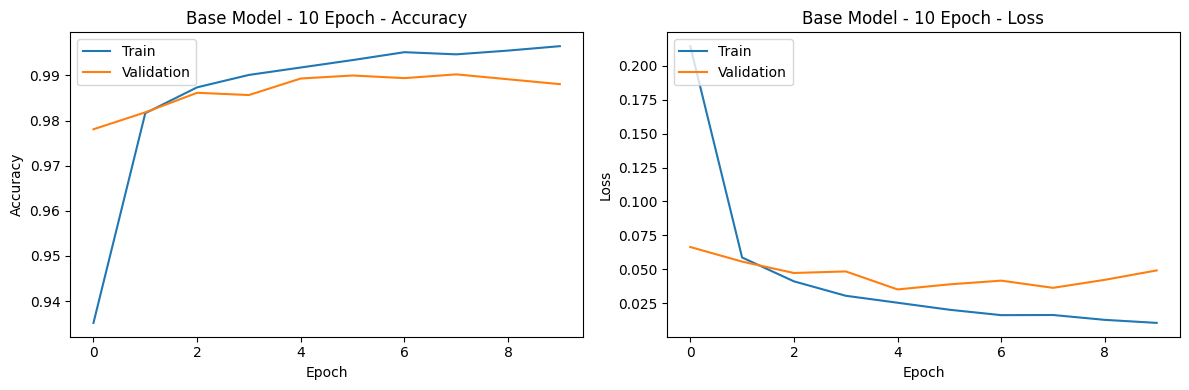

In [12]:
base_model_e10 = models.Sequential()
base_model_e10.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
base_model_e10.add(layers.MaxPooling2D((2, 2)))
base_model_e10.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model_e10.add(layers.MaxPooling2D((2, 2)))
base_model_e10.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model_e10.add(layers.Flatten())
base_model_e10.add(layers.Dense(64, activation='relu'))
base_model_e10.add(layers.Dense(10, activation='softmax'))

# Model Compilation
base_model_e10.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model for 10 epochs
print(f'Train the model for 10 epochs')
history_e10 = base_model_e10.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)
print('------------------------------------------------------------------------------------------------------------------------')
test_loss, test_acc = base_model_e10.evaluate(x_test, y_test)
print(f'Test accuracy for model - base_model_e10: {test_acc * 100:.2f}%')


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history_e10.history['accuracy'])
plt.plot(history_e10.history['val_accuracy'])
plt.title('Base Model - 10 Epoch - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_e10.history['loss'])
plt.plot(history_e10.history['val_loss'])
plt.title('Base Model - 10 Epoch - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Train the model for 20 epochs
Epoch 1/20
750/750 [==============================] - 6s 6ms/step - loss: 0.2169 - accuracy: 0.9324 - val_loss: 0.0682 - val_accuracy: 0.9784
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0533 - val_accuracy: 0.9851
Epoch 3/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0388 - accuracy: 0.9880 - val_loss: 0.0384 - val_accuracy: 0.9889
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0466 - val_accuracy: 0.9875
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0232 - accuracy: 0.9925 - val_loss: 0.0419 - val_accuracy: 0.9886
Epoch 6/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0396 - val_accuracy: 0.9884
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0386

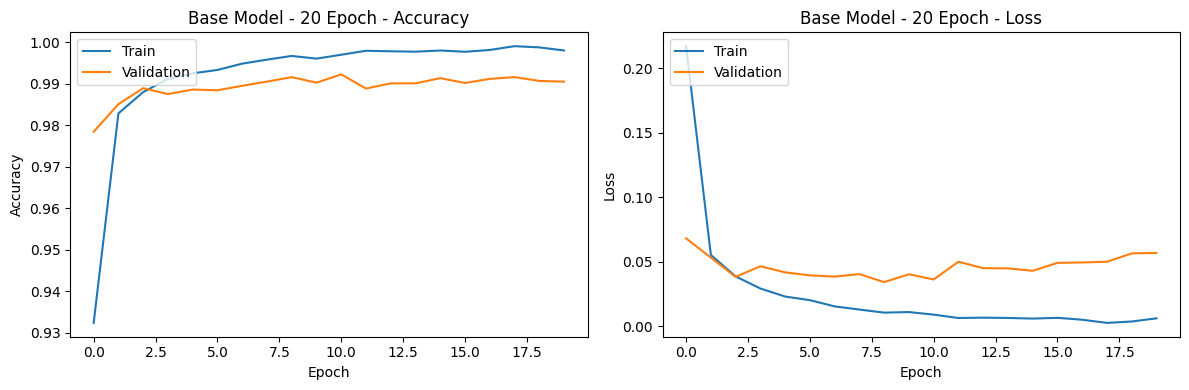

In [13]:
# Create a new model with multiple layers
base_model_e20 = models.Sequential()
base_model_e20.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
base_model_e20.add(layers.MaxPooling2D((2, 2)))
base_model_e20.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model_e20.add(layers.MaxPooling2D((2, 2)))
base_model_e20.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model_e20.add(layers.Flatten())
base_model_e20.add(layers.Dense(64, activation='relu'))
base_model_e20.add(layers.Dense(10, activation='softmax'))

# Model Compilation
base_model_e20.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 20 epochs
print(f'Train the model for 20 epochs')
history_e20 = base_model_e20.fit(x_train, y_train, epochs=10*2, batch_size=64, validation_split=0.2)
print('------------------------------------------------------------------------------------------------------------------------')
test_loss, test_acc = base_model_e20.evaluate(x_test, y_test)
print(f'Test accuracy for model - base_model_e20: {test_acc * 100:.2f}%')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_e20.history['accuracy'])
plt.plot(history_e20.history['val_accuracy'])
plt.title('Base Model - 20 Epoch - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_e20.history['loss'])
plt.plot(history_e20.history['val_loss'])
plt.title('Base Model - 20 Epoch - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Train the model for 40 epochs
Epoch 1/40
750/750 [==============================] - 8s 5ms/step - loss: 0.2239 - accuracy: 0.9327 - val_loss: 0.0703 - val_accuracy: 0.9793
Epoch 2/40
750/750 [==============================] - 4s 5ms/step - loss: 0.0622 - accuracy: 0.9806 - val_loss: 0.0528 - val_accuracy: 0.9847
Epoch 3/40
750/750 [==============================] - 4s 6ms/step - loss: 0.0430 - accuracy: 0.9863 - val_loss: 0.0686 - val_accuracy: 0.9797
Epoch 4/40
750/750 [==============================] - 4s 6ms/step - loss: 0.0336 - accuracy: 0.9895 - val_loss: 0.0418 - val_accuracy: 0.9869
Epoch 5/40
750/750 [==============================] - 4s 5ms/step - loss: 0.0262 - accuracy: 0.9915 - val_loss: 0.0427 - val_accuracy: 0.9887
Epoch 6/40
750/750 [==============================] - 4s 5ms/step - loss: 0.0212 - accuracy: 0.9932 - val_loss: 0.0394 - val_accuracy: 0.9881
Epoch 7/40
750/750 [==============================] - 5s 7ms/step - loss: 0.0174 - accuracy: 0.9940 - val_loss: 0.0369

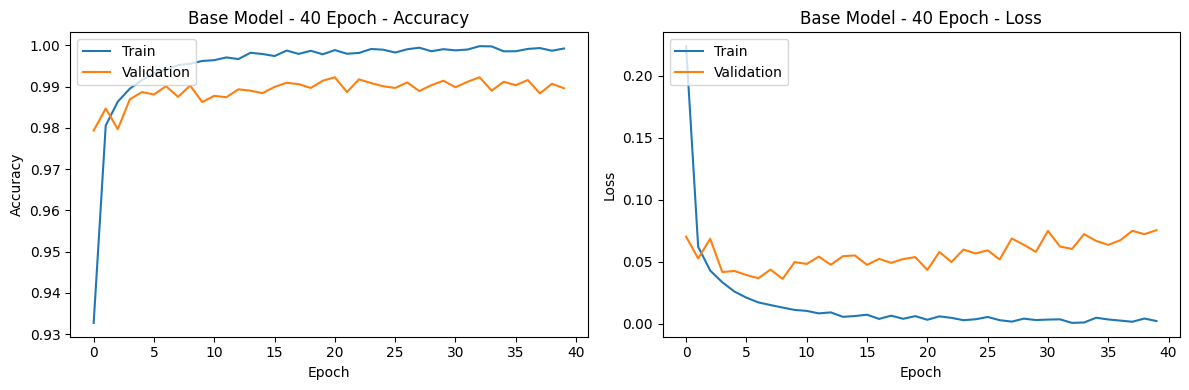

In [14]:
# Create a new model with multiple layers
base_model_e40 = models.Sequential()
base_model_e40.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
base_model_e40.add(layers.MaxPooling2D((2, 2)))
base_model_e40.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model_e40.add(layers.MaxPooling2D((2, 2)))
base_model_e40.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model_e40.add(layers.Flatten())
base_model_e40.add(layers.Dense(64, activation='relu'))
base_model_e40.add(layers.Dense(10, activation='softmax'))

# Model Compilation
base_model_e40.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model for 40 epochs
print(f'Train the model for 40 epochs')
history_e40 = base_model_e40.fit(x_train, y_train, epochs=10*4, batch_size=64, validation_split=0.2)
print('------------------------------------------------------------------------------------------------------------------------')
test_loss, test_acc = base_model_e40.evaluate(x_test, y_test)
print(f'Test accuracy for model - base_model_e450: {test_acc * 100:.2f}%')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_e40.history['accuracy'])
plt.plot(history_e40.history['val_accuracy'])
plt.title('Base Model - 40 Epoch - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_e40.history['loss'])
plt.plot(history_e40.history['val_loss'])
plt.title('Base Model - 40 Epoch - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Train the model for 80 epochs
Epoch 1/80
750/750 [==============================] - 6s 5ms/step - loss: 0.2063 - accuracy: 0.9360 - val_loss: 0.0667 - val_accuracy: 0.9804
Epoch 2/80
750/750 [==============================] - 4s 5ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0526 - val_accuracy: 0.9858
Epoch 3/80
750/750 [==============================] - 4s 6ms/step - loss: 0.0393 - accuracy: 0.9875 - val_loss: 0.0575 - val_accuracy: 0.9837
Epoch 4/80
750/750 [==============================] - 4s 6ms/step - loss: 0.0290 - accuracy: 0.9904 - val_loss: 0.0382 - val_accuracy: 0.9890
Epoch 5/80
750/750 [==============================] - 4s 5ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0415 - val_accuracy: 0.9882
Epoch 6/80
750/750 [==============================] - 4s 5ms/step - loss: 0.0183 - accuracy: 0.9941 - val_loss: 0.0465 - val_accuracy: 0.9880
Epoch 7/80
750/750 [==============================] - 5s 6ms/step - loss: 0.0163 - accuracy: 0.9945 - val_loss: 0.0428

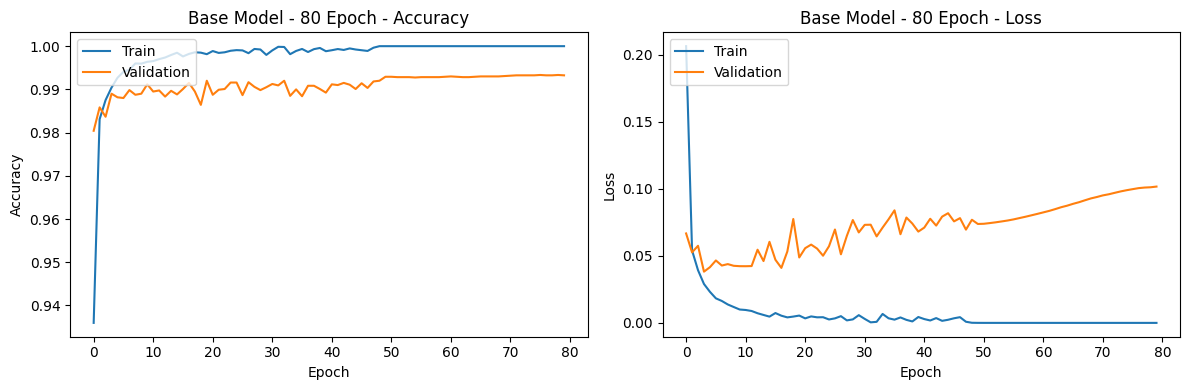

In [15]:
# Create a new model with multiple layers
base_model_e80 = models.Sequential()
base_model_e80.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
base_model_e80.add(layers.MaxPooling2D((2, 2)))
base_model_e80.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model_e80.add(layers.MaxPooling2D((2, 2)))
base_model_e80.add(layers.Conv2D(64, (3, 3), activation='relu'))
base_model_e80.add(layers.Flatten())
base_model_e80.add(layers.Dense(64, activation='relu'))
base_model_e80.add(layers.Dense(10, activation='softmax'))

# Model Compilation
base_model_e80.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# Train the model for 80 epochs
print(f'Train the model for 80 epochs')
history_e80 = base_model_e80.fit(x_train, y_train, epochs=10*8, batch_size=64, validation_split=0.2)
print('------------------------------------------------------------------------------------------------------------------------')
test_loss, test_acc = base_model_e80.evaluate(x_test, y_test)
print(f'Test accuracy for model - base_model_e80: {test_acc * 100:.2f}%')

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_e80.history['accuracy'])
plt.plot(history_e80.history['val_accuracy'])
plt.title('Base Model - 80 Epoch - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_e80.history['loss'])
plt.plot(history_e80.history['val_loss'])
plt.title('Base Model - 80 Epoch - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

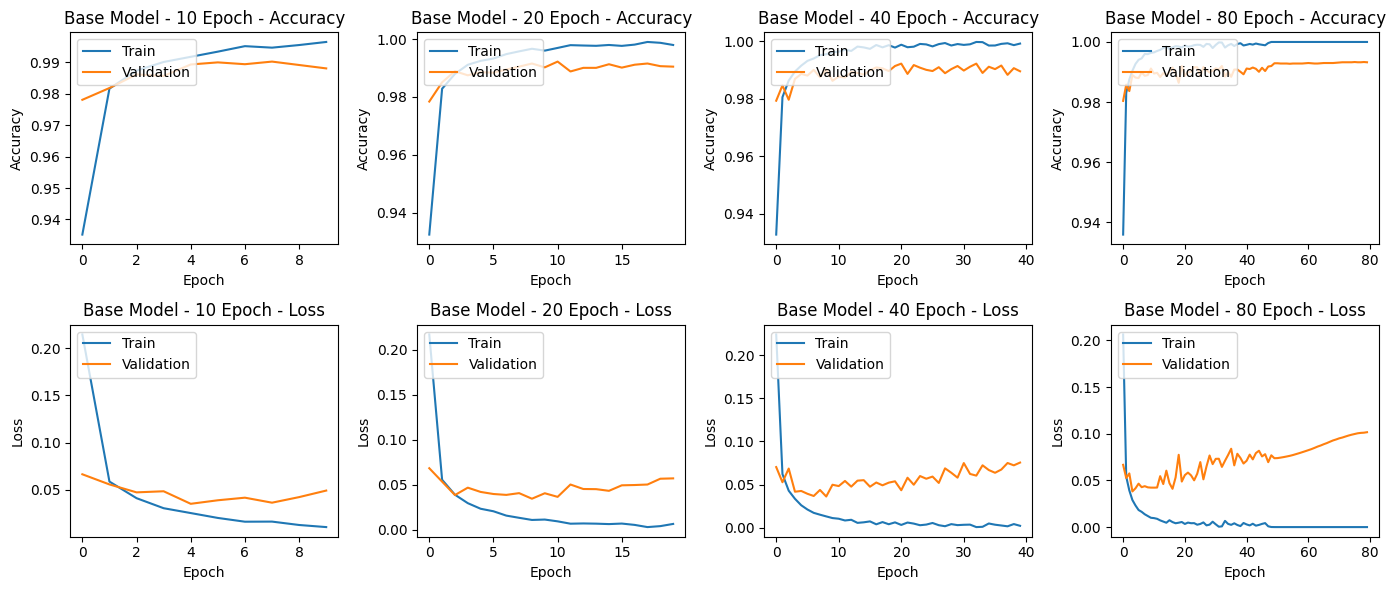

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# First row

# Plot for base_model
plt.subplot(2, 4, 1)
plt.plot(history_e10.history['accuracy'])
plt.plot(history_e10.history['val_accuracy'])
plt.title('Base Model - 10 Epoch - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 4, 2)
plt.plot(history_e20.history['accuracy'])
plt.plot(history_e20.history['val_accuracy'])
plt.title('Base Model - 20 Epoch - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 4, 3)
plt.plot(history_e40.history['accuracy'])
plt.plot(history_e40.history['val_accuracy'])
plt.title('Base Model - 40 Epoch - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 4, 4)
plt.plot(history_e80.history['accuracy'])
plt.plot(history_e80.history['val_accuracy'])
plt.title('Base Model - 80 Epoch - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Second row

plt.subplot(2, 4, 5)
plt.plot(history_e10.history['loss'])
plt.plot(history_e10.history['val_loss'])
plt.title('Base Model - 10 Epoch - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 4, 6)
plt.plot(history_e20.history['loss'])
plt.plot(history_e20.history['val_loss'])
plt.title('Base Model - 20 Epoch - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 4, 7)
plt.plot(history_e40.history['loss'])
plt.plot(history_e40.history['val_loss'])
plt.title('Base Model - 40 Epoch - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 4, 8)
plt.plot(history_e80.history['loss'])
plt.plot(history_e80.history['val_loss'])
plt.title('Base Model - 80 Epoch - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.tight_layout()
plt.show()


**OBSERVATIONS**



---


| Epoch # | Training Duration | Overfitting Likelihood | Potential Performance                          |
|-------|-------------------|------------------------|-----------------------------------------------|
| 10   | Shortest          | Lowest                 | Might underfit; sub-optimal performance on both training and validation sets if not enough epochs. |
| 20   | Moderate          | Moderate               | Better than E10 if the model hadn’t yet converged in the first 10 epochs; Risk of overfitting if performance plateaus or starts declining. |
| 40   | Long              | High                   | Could be better than E20 if still improving; Higher risk of overfitting
| 80   | Longest           | Highest                | Likely near-perfect on training set; High risk of overfitting and potential sub-optimal validation performance. |



---


**SUMMARY**


* Training Duration vs. Overfitting: There's a clear correlation between the length of training and the risk of overfitting. The longer a model trains, especially the more likely it is to overfit

* Training vs Validation Loss: A clear indicator of overfitting is when training loss continues to decrease, but validation loss starts to increase. clearnly seen in epcho 40 and 80.

* Regularization Techniques: Based on my limited understanding, i think we can use funcitons like dropout or data augmentation to prevent overfitting.



---



# **Models with different Configurations**

In [18]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Data Preprocessing
x_train = x_train.reshape((60000, 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1))
x_test = x_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [19]:
# Model 2: Deeper Convolutional Network
model_v2 = models.Sequential()
model_v2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_v2.add(layers.MaxPooling2D((2, 2)))
model_v2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_v2.add(layers.MaxPooling2D((2, 2)))
model_v2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_v2.add(layers.Flatten())
model_v2.add(layers.Dense(128, activation='relu'))
model_v2.add(layers.Dense(10, activation='softmax'))
model_v2.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Model 3

In [20]:
# Model 3: Regularized Model (added dropout)
model_v3 = models.Sequential()
model_v3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_v3.add(layers.MaxPooling2D((2, 2)))
model_v3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_v3.add(layers.MaxPooling2D((2, 2)))
model_v3.add(layers.Flatten())
model_v3.add(layers.Dropout(0.5))
model_v3.add(layers.Dense(128, activation='relu'))
model_v3.add(layers.Dense(10, activation='softmax'))
model_v3.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [21]:
# Model 4: Different Optimizer (SGD)
from tensorflow.keras.optimizers import SGD

model_v4 = models.Sequential()
model_v4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_v4.add(layers.MaxPooling2D((2, 2)))
model_v4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_v4.add(layers.MaxPooling2D((2, 2)))
model_v4.add(layers.Flatten())
model_v4.add(layers.Dense(128, activation='relu'))
model_v4.add(layers.Dense(10, activation='softmax'))
model_v4.compile(optimizer=SGD(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [22]:
# Model 5: Different Optimizer (RMSprop)
from tensorflow.keras.optimizers import RMSprop

model_v5 = models.Sequential()
model_v5.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_v5.add(layers.MaxPooling2D((2, 2)))
model_v5.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_v5.add(layers.MaxPooling2D((2, 2)))
model_v5.add(layers.Flatten())
model_v5.add(layers.Dense(128, activation='relu'))
model_v5.add(layers.Dense(10, activation='softmax'))
model_v5.compile(optimizer=RMSprop(learning_rate=0.001),
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [23]:
model_hv2 = model_v2.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
test_loss, test_acc = model_v2.evaluate(x_test, y_test)
print(f'Test accuracy for model_v2: {test_acc * 100:.2f}%')

Epoch 1/20
750/750 [==============================] - 7s 7ms/step - loss: 0.1772 - accuracy: 0.9446 - val_loss: 0.0589 - val_accuracy: 0.9826
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0504 - val_accuracy: 0.9850
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0341 - accuracy: 0.9893 - val_loss: 0.0398 - val_accuracy: 0.9877
Epoch 4/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0397 - val_accuracy: 0.9888
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0407 - val_accuracy: 0.9889
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0398 - val_accuracy: 0.9884
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0354 - val_accuracy: 0.9912
Epoch 

In [24]:
model_hv3 = model_v3.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
test_loss, test_acc = model_v3.evaluate(x_test, y_test)
print(f'Test accuracy for model_v3: {test_acc * 100:.2f}%')

Epoch 1/20
750/750 [==============================] - 6s 5ms/step - loss: 0.2195 - accuracy: 0.9311 - val_loss: 0.0658 - val_accuracy: 0.9818
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 0.0750 - accuracy: 0.9762 - val_loss: 0.0463 - val_accuracy: 0.9864
Epoch 3/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0565 - accuracy: 0.9817 - val_loss: 0.0347 - val_accuracy: 0.9897
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0447 - accuracy: 0.9858 - val_loss: 0.0359 - val_accuracy: 0.9888
Epoch 5/20
750/750 [==============================] - 4s 6ms/step - loss: 0.0388 - accuracy: 0.9878 - val_loss: 0.0313 - val_accuracy: 0.9908
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0337 - accuracy: 0.9889 - val_loss: 0.0298 - val_accuracy: 0.9921
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0278 - val_accuracy: 0.9918
Epoch 

In [25]:
model_hv4 = model_v4.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
test_loss, test_acc = model_v4.evaluate(x_test, y_test)
print(f'Test accuracy for model_v4: {test_acc * 100:.2f}%')

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 2.2518 - accuracy: 0.2629 - val_loss: 2.1820 - val_accuracy: 0.5087
Epoch 2/20
750/750 [==============================] - 5s 6ms/step - loss: 2.0512 - accuracy: 0.6023 - val_loss: 1.8178 - val_accuracy: 0.7026
Epoch 3/20
750/750 [==============================] - 3s 5ms/step - loss: 1.3858 - accuracy: 0.7342 - val_loss: 0.9050 - val_accuracy: 0.8087
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.7153 - accuracy: 0.8258 - val_loss: 0.5279 - val_accuracy: 0.8673
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.4952 - accuracy: 0.8675 - val_loss: 0.4051 - val_accuracy: 0.8911
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.4068 - accuracy: 0.8876 - val_loss: 0.3475 - val_accuracy: 0.9032
Epoch 7/20
750/750 [==============================] - 4s 5ms/step - loss: 0.3581 - accuracy: 0.8986 - val_loss: 0.3116 - val_accuracy: 0.9124
Epoch 

In [26]:
model_hv5 = model_v5.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=0.2)
test_loss, test_acc = model_v5.evaluate(x_test, y_test)
print(f'Test accuracy for model_v4: {test_acc * 100:.2f}%')

Epoch 1/20
750/750 [==============================] - 5s 5ms/step - loss: 0.1790 - accuracy: 0.9446 - val_loss: 0.0713 - val_accuracy: 0.9798
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0512 - accuracy: 0.9839 - val_loss: 0.0504 - val_accuracy: 0.9860
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.0566 - val_accuracy: 0.9840
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0193 - accuracy: 0.9938 - val_loss: 0.0390 - val_accuracy: 0.9898
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0137 - accuracy: 0.9958 - val_loss: 0.0434 - val_accuracy: 0.9882
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0446 - val_accuracy: 0.9903
Epoch 

In [27]:
# Train all models for 20 epochs and capture training history
model_hv2 = model_v2.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)
model_hv3 = model_v3.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)
model_hv4 = model_v4.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=0)

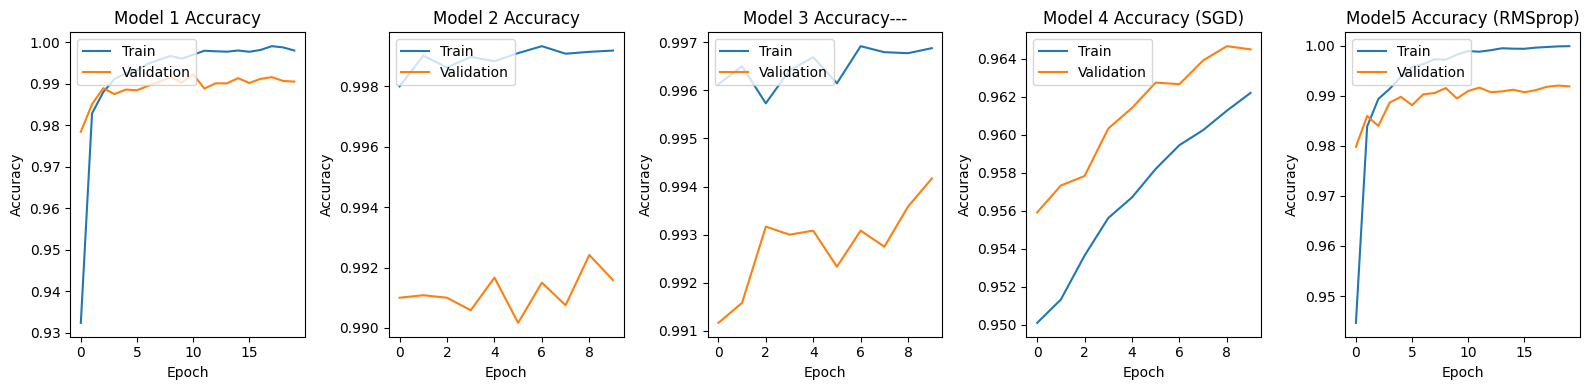

In [28]:

plt.figure(figsize=(16, 4))

# Model 1 (Original Model)
plt.subplot(1, 5, 1)
plt.plot(history_e20.history['accuracy'])
plt.plot(history_e20.history['val_accuracy'])
plt.title('Model 1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Model 2 (Deeper Convolutional Network)
plt.subplot(1, 5, 2)
plt.plot(model_hv2.history['accuracy'])
plt.plot(model_hv2.history['val_accuracy'])
plt.title('Model 2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Model 3 (Regularized Model)
plt.subplot(1, 5, 3)
plt.plot(model_hv3.history['accuracy'])
plt.plot(model_hv3.history['val_accuracy'])
plt.title('Model 3 Accuracy---')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Model 4 (Different Optimizer - SGD)
plt.subplot(1, 5, 4)
plt.plot(model_hv4.history['accuracy'])
plt.plot(model_hv4.history['val_accuracy'])
plt.title('Model 4 Accuracy (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Model 4 (Different Optimizer - RMSprop)
plt.subplot(1, 5, 5)
plt.plot(model_hv5.history['accuracy'])
plt.plot(model_hv5.history['val_accuracy'])
plt.title('Model5 Accuracy (RMSprop)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')


plt.tight_layout()
plt.show()

**SUMMARY**


---


## Comparative Analysis of Models

| Feature / Model   | e20       | v2       | v3       | v4       | v5       |
|-------------------|-----------|----------|----------|----------|----------|
| **Optimizer**     | SGD       | SGD      | SGD      | SGD      | RMSprop  |
| **Conv Layers**   | 2         | 2        | 2        | 3        | 2        |
| **Dense Layers**  | 2         | 2        | 3        | 2        | 2        |
| **Filters**       | 32, 64    | 32, 64   | 32, 64   | 32, 64, 128 | 32, 64 |



---

### Comparative Analysis of Models

| Feature/Model   | **Epoch Results** |
|-----------------|-------------------|
| **e20**         | Displayed  fluctuations with both training and validation accuracies.|
| **v2**          | Similar  behavior as e20 |
| **v3**          | This model showed consistent improvement in accuracy over the epochs <br> could be possible overfitting. |
| **v4**          | This model, with an added convolutional layer, showed a good training trajectory <br> The gap between training and validation accuracy again suggests a possible overfitting scenario. |
| **v5**          | v5 starts strong and consistently improves.& achieves a  training accuracy of 100%. Might be overfitting. |





# CUSTOM DATASET

In [29]:
from google.colab import drive
drive.mount('/content/drive')

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing import image
from PIL import Image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.regularizers import l2

# Define the model
model_v7 = Sequential([
    # Layer 1
    Conv2D(filters=32, kernel_size=5, strides=1, activation='relu', input_shape=(28,28,1), kernel_regularizer=l2(0.0005)),
    # Layer 2
    Conv2D(filters=32, kernel_size=5, strides=1, use_bias=False),
    # Layer 3
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(0.25),
    # Layer 4
    Conv2D(filters=64, kernel_size=3, strides=1, activation='relu', kernel_regularizer=l2(0.0005)),
    # Layer 5
    Conv2D(filters=64, kernel_size=3, strides=1, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=2, strides=2),
    Dropout(0.25),
    Flatten(),
    # Layer 6
    Dense(units=256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    # Layer 8
    Dense(units=128, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    # Layer 10
    Dense(units=84, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.25),
    # Output
    Dense(units=10, activation='softmax')
])

# model_v7.summary()  # Optional: To display the model summary
model_v7.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

model_hv7 = model_v7.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)
# test_loss, test_acc = model_v7.evaluate(x_test, y_test)
# print(f'Test accuracy for model_v4: {test_acc * 100:.2f}%')


Epoch 1/30
750/750 [==============================] - 11s 10ms/step - loss: 0.2546 - accuracy: 0.9323 - val_loss: 0.0862 - val_accuracy: 0.9814
Epoch 2/30
750/750 [==============================] - 6s 9ms/step - loss: 0.0996 - accuracy: 0.9769 - val_loss: 0.0582 - val_accuracy: 0.9865
Epoch 3/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0812 - accuracy: 0.9805 - val_loss: 0.0513 - val_accuracy: 0.9894
Epoch 4/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0675 - accuracy: 0.9847 - val_loss: 0.0591 - val_accuracy: 0.9863
Epoch 5/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0606 - accuracy: 0.9859 - val_loss: 0.0543 - val_accuracy: 0.9888
Epoch 6/30
750/750 [==============================] - 7s 9ms/step - loss: 0.0546 - accuracy: 0.9870 - val_loss: 0.0451 - val_accuracy: 0.9900
Epoch 7/30
750/750 [==============================] - 6s 8ms/step - loss: 0.0526 - accuracy: 0.9877 - val_loss: 0.0504 - val_accuracy: 0.9891
Epoc

[7 9 0 3 8 5 1 2 6 4]


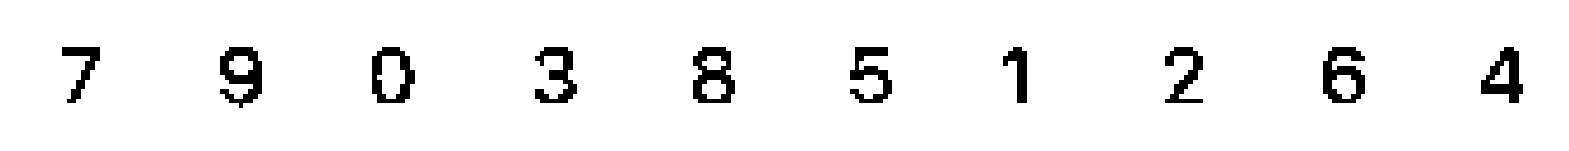

In [168]:

# Load custom images from Google Drive
custom_images = []
custom_labels = []
base_folder_path = '/content/drive/MyDrive/Teaching/TME_6015/Assignment_1_v2'
for folder_name in os.listdir(base_folder_path):
    folder_path = os.path.join(base_folder_path, folder_name)
    # print(folder_path)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
          if filename.endswith('.png') or filename.endswith('.PNG') or filename.endswith('.JPG')or filename.endswith('.jpg'):
              img_path = os.path.join(folder_path, filename)
              img = Image.open(img_path)
              # img = Image.open(img_path).convert('L')
              # img = img.convert('L')  # convert image to grayscale
              img = img.resize((28, 28))  # resize image to match MNIST data
              # img = img.rotate(-90)
              threshold = 80
              img = img.point(lambda p: p > threshold and 255)
              img_array = np.array(img)
              custom_images.append(img_array)
              custom_labels.append(int(folder_name))  # use folder name as label

# Convert the list of custom images and labels to numpy arrays
custom_images = np.array(custom_images)
custom_labels = np.array(custom_labels)
# print(custom_images)
print(custom_labels)
# # Preprocess the custom images
custom_images = custom_images / 255.0
# print(custom_images)


display_image = custom_images[3] * 255
# # Convert the image data to uint8
display_image = display_image.astype(np.uint8)
# # Create a PIL image
img = Image.fromarray(display_image)
# # Display the image
img

# # print(custom_images.shape)

fig, axes = plt.subplots(1, len(custom_images), figsize=(20, 10))
for i, image in enumerate(custom_images):
    display_image = image * 255
    display_image = display_image.astype(np.uint8)
    img = Image.fromarray(display_image)
    axes[i].imshow(img)
    axes[i].axis('off')

plt.show()

In [169]:
import numpy as np
from IPython.display import display, HTML

predictions_e10 = base_model_e40.predict(custom_images)
predictions_e20 = base_model_e20.predict(custom_images)
predictions_v7 = model_v7.predict(custom_images)
predictions_v3 = model_v3.predict(custom_images)
predictions_v2 = model_v2.predict(custom_images)

# Start the HTML string for the table
html_str = "<table border='1'>"
html_str += "<tr><th>True Label</th><th>Base_e20 Predicted</th><th>V3 Predicted</th><th>V7 Predicted</th><th>V2 Predicted</th><th>Base_e10 Predicted</th></tr>"

for i in range(len(custom_images)):
    predicted_class_e20 = np.argmax(predictions_e20[i])
    predicted_class_v7 = np.argmax(predictions_v7[i])
    predicted_class_v3 = np.argmax(predictions_v3[i])
    predicted_class_v2 = np.argmax(predictions_v2[i])
    predicted_class_e10 = np.argmax(predictions_e10[i])
    true_label = custom_labels[i]

    # Check if the prediction from model_v7 is equal to the true label
    if predicted_class_v7 == true_label:
        cell_v7 = f"<td style='background-color: green;'>{predicted_class_v7}</td>"
    else:
        cell_v7 = f"<td>{predicted_class_v7}</td>"

    # Check if the prediction from model_v3 is equal to the true label
    if predicted_class_v3 == true_label:
        cell_v3 = f"<td style='background-color: green;'>{predicted_class_v3}</td>"
    else:
        cell_v3 = f"<td>{predicted_class_v3}</td>"

     # Check if the prediction from model_e20 is equal to the true label
    if predicted_class_e20 == true_label:
        cell_e20 = f"<td style='background-color: green;'>{predicted_class_e20}</td>"
    else:
        cell_e20 = f"<td>{predicted_class_e20}</td>"

    # Check if the prediction from model_v2 is equal to the true label
    if predicted_class_v2 == true_label:
        cell_v2 = f"<td style='background-color: green;'>{predicted_class_v2}</td>"
    else:
        cell_v2 = f"<td>{predicted_class_v2}</td>"


     # Check if the prediction from model_e10 is equal to the true label
    if predicted_class_e10 == true_label:
        cell_e10 = f"<td style='background-color: green;'>{predicted_class_e10}</td>"
    else:
        cell_e10 = f"<td>{predicted_class_e10}</td>"

    html_str += f"<tr><td>{true_label}</td>{cell_e20}{cell_v3}{cell_v7}{cell_v2}{cell_e10}</tr>"

# Close the table tag
html_str += "</table>"

# Display the table
display(HTML(html_str))


1/1 [==============================] - 0s 31ms/step


True Label,Base_e20 Predicted,V3 Predicted,V7 Predicted,V2 Predicted,Base_e10 Predicted
7,3,7,1,7,7
9,9,9,3,8,5
0,0,0,7,0,0
3,3,3,3,3,5
8,3,3,1,8,5
5,3,3,1,5,5
1,1,9,1,2,2
2,2,2,7,2,2
6,3,3,1,5,5
4,3,6,1,2,5


Ran the custome Set in models that was build from the begining

* Base_e20 Predicted	: Base model with 20 epoch
* V3 Predicted	: Regularized model
* V7 Predicted	: tried this referening to a model in (https://towardsdatascience.com/going-beyond-99-mnist-handwritten-digits-recognition-cfff96337392)
* V2 Predicted  : Deeper Convolution Network
* Base_e10 Predicted : Base model with 10 epoch


OBSERVBATION:

The model v2, with deepr convolution network,  seems to be more accurate compare to others. Concerned that the issue could be also due to my image loading.

